Dharma Setiawan Marketing Campaign

# Initialization

In [284]:
#Data and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import kendalltau
import plotly.express as px

## Mengubah parameter default matplotlib
Parameter default matplotlib dapat diubah dengan rcParams sebagai berikut


In [285]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Import Data set

In [286]:
url_dataset = "https://raw.githubusercontent.com/dharmazz/Boost-Marketing-Campaign/main/marketing_campaign_data.csv"
df = pd.read_csv(url_dataset)
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


# Features

In [287]:
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [288]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df['age'] = 2022 - df['Year_Birth']
df['join_at_age'] = df['Dt_Customer'].dt.year - df['Year_Birth']
df['total_children'] = df['Kidhome'] + df['Teenhome']
df['is_parents'] = np.where(df['total_children'] > 0, 1, 0)

In [289]:
# age_range
df.loc[(df['age'] >= 0) & (df['age'] < 12), 'age_range'] = "child"
df.loc[(df['age'] >= 12) & (df['age'] < 18), 'age_range'] = "teens"
df.loc[(df['age'] >= 18) & (df['age'] < 36), 'age_range'] = "young_adults"
df.loc[(df['age'] >= 36) & (df['age'] < 55), 'age_range'] = "middle_aged_adults"
df.loc[(df['age'] >= 55), 'age_range'] = "older_adults"

In [290]:
# amount spent
df['total_amount_spent'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] +df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']



In [291]:
# accepted campaigns
df['accepted_campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3']+ df['AcceptedCmp4'] + df['AcceptedCmp5']

In [292]:
# total purchased transaction 
df['total_transaction'] = df['NumDealsPurchases'] + df['NumWebPurchases']+ df['NumCatalogPurchases'] + df['NumStorePurchases']
                             
def safe_div(x,y):
    if y == 0:
        return 0
    return x / y

df['conversion_rate'] = df.apply(lambda x: safe_div(x['total_transaction'],x['NumWebVisitsMonth']), axis=1)

# EDA

## Statistical Summaries

In [293]:
df.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,Z_Revenue,Response,age,join_at_age,total_children,is_parents,total_amount_spent,accepted_campaign,total_transaction,conversion_rate
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,...,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,...,11.0,0.149107,53.194196,44.222321,0.950446,0.715179,6.057982e+05,0.297768,14.862054,4.395222
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,...,0.0,0.356274,11.984069,12.022855,0.751803,0.451430,6.022493e+05,0.678381,7.677173,4.913624
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,11.0,0.000000,26.000000,16.000000,0.000000,0.000000,5.000000e+03,0.000000,0.000000,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,...,11.0,0.000000,45.000000,36.000000,0.000000,0.000000,6.875000e+04,0.000000,8.000000,1.222222
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,...,11.0,0.000000,52.000000,43.000000,1.000000,1.000000,3.960000e+05,0.000000,15.000000,2.600000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,...,11.0,0.000000,63.000000,54.000000,1.000000,1.000000,1.045500e+06,0.000000,21.000000,5.350000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,...,11.0,1.000000,129.000000,121.000000,3.000000,1.000000,2.525000e+06,4.000000,44.000000,43.000000


In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2240 non-null   int64         
 1   ID                   2240 non-null   int64         
 2   Year_Birth           2240 non-null   int64         
 3   Education            2240 non-null   object        
 4   Marital_Status       2240 non-null   object        
 5   Income               2216 non-null   float64       
 6   Kidhome              2240 non-null   int64         
 7   Teenhome             2240 non-null   int64         
 8   Dt_Customer          2240 non-null   datetime64[ns]
 9   Recency              2240 non-null   int64         
 10  MntCoke              2240 non-null   int64         
 11  MntFruits            2240 non-null   int64         
 12  MntMeatProducts      2240 non-null   int64         
 13  MntFishProducts      2240 non-nul

In [295]:
numerical_features = ['Income','Kidhome','Teenhome','Recency','MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',
                      'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Z_CostContact','Z_Revenue',
                      'age','join_at_age','total_children','total_amount_spent']

categorical_features = ['Education','Marital_Status','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Response','is_parents','age_range']

In [296]:
df[categorical_features].describe()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,is_parents
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.064286,0.013393,0.072768,0.074554,0.072768,0.009375,0.149107,0.715179
std,0.245316,0.114976,0.259813,0.262728,0.259813,0.096391,0.356274,0.451430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Correlation

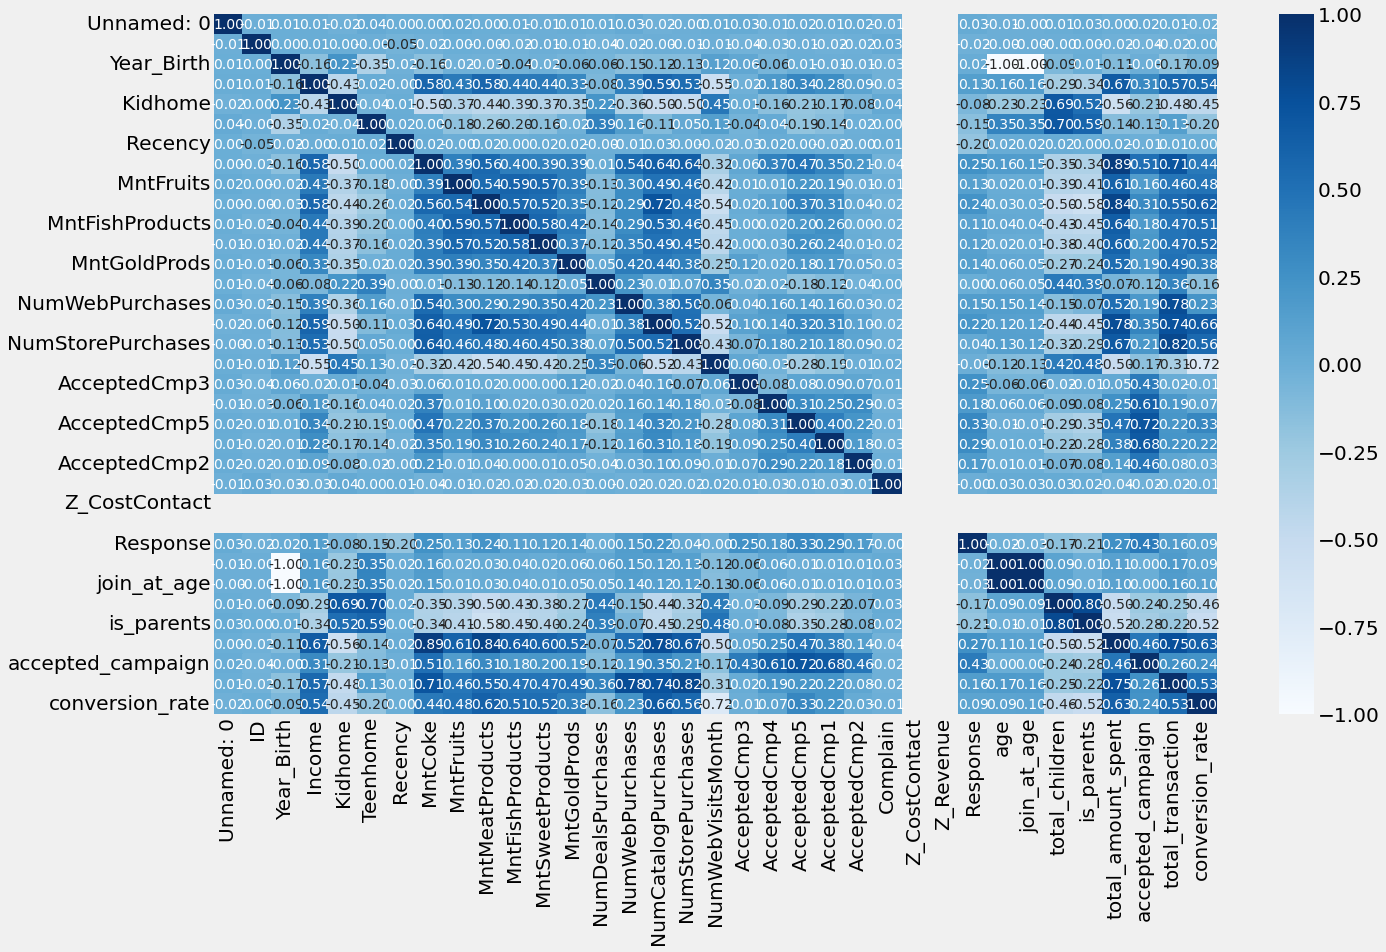

In [297]:
# correlation heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

## Income vs Spending

(0.0, 120000000.0)

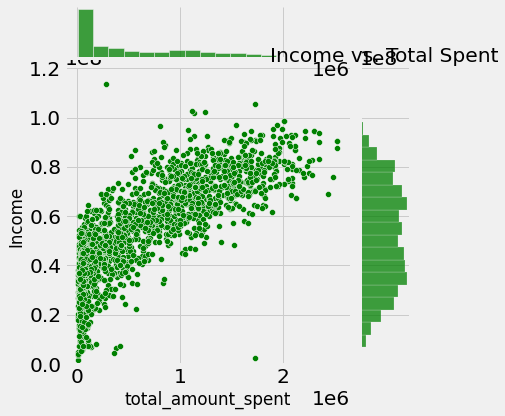

In [298]:
plot = sns.jointplot(x=df["total_amount_spent"], y=df["Income"],kind='scatter', color = 'green')
plt.title('Income vs. Total Spent')
plot.ax_marg_y.set_ylim(0, 120000000)

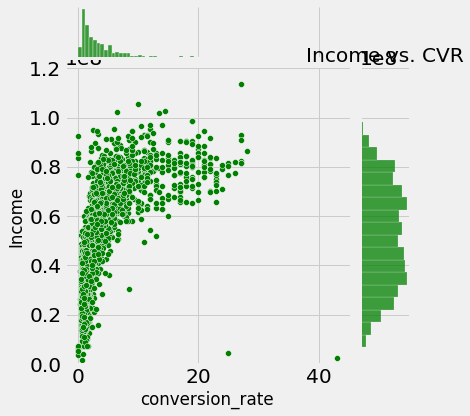

In [299]:
plot = sns.jointplot(x=df["conversion_rate"], y=df["Income"],kind='scatter', color = 'green')
plt.title('Income vs. CVR')
plot.ax_marg_y.set_ylim(0, 120000000)
plt.show()

## Age vs Spending

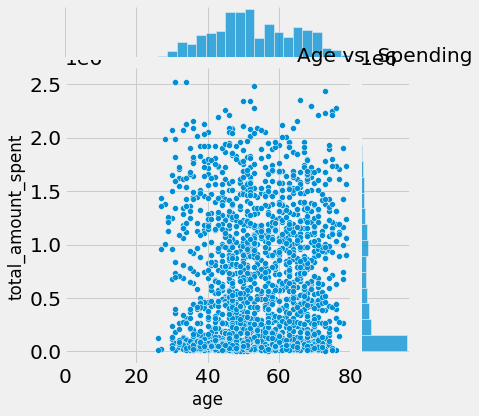

In [300]:
plot = sns.jointplot(x=df["age"], y=df["total_amount_spent"])
plt.title('Age vs. Spending')
plot.ax_marg_x.set_xlim(0, 80)
plt.show()



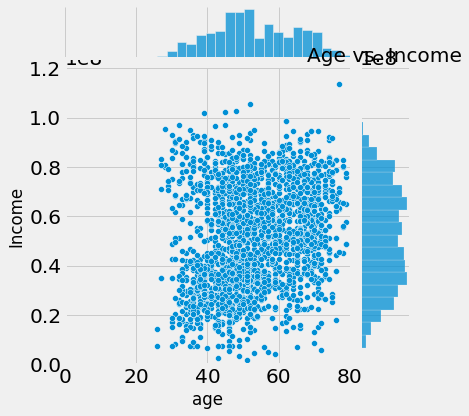

In [301]:
plot = sns.jointplot(x=df["age"], y=df["Income"])
plt.title('Age vs. Income')
plot.ax_marg_x.set_xlim(0, 80)
plot.ax_marg_y.set_ylim(0, 120000000)
plt.show()



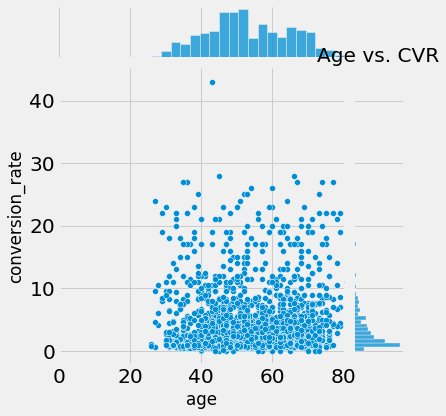

In [302]:
plot = sns.jointplot(x=df["age"], y=df["conversion_rate"])
plt.title('Age vs. CVR')
plot.ax_marg_x.set_xlim(0, 80)
plt.show()



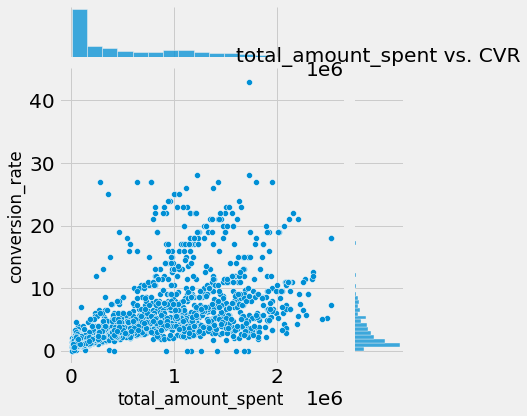

In [303]:
plot = sns.jointplot(x=df["total_amount_spent"], y=df["conversion_rate"])
plt.title('total_amount_spent vs. CVR')
plt.show()

# Data Cleaning and Processing

### Missing Data

In [304]:
df = df.drop(columns = ["Unnamed: 0"])

In [305]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'age', 'join_at_age', 'total_children', 'is_parents', 'age_range',
       'total_amount_spent', 'accepted_campaign', 'total_transaction',
       'conversion_rate'],
      dtype='object')

In [306]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
age                     0
join_at_age             0
total_children          0
is_parents              0
age_range               0
total_amount_spent      0
accepted_campaign       0
total_transaction       0
conversion_rate         0
dtype: int64

We can remove null values

In [307]:
df = df.dropna()

In [308]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
age                    0
join_at_age            0
total_children         0
is_parents             0
age_range              0
total_amount_spent     0
accepted_campaign      0
total_transaction      0
conversion_rate        0
dtype: int64

In [309]:
#df = df.drop(columns=['Unnamed: 0', 'Year_Birth', 'Dt_Customer'])

### Duplicated Row

In [310]:
df.duplicated().sum()

0

In [311]:
df.shape

(2216, 38)

Tidak ada data duplikat

### Feature Encoding

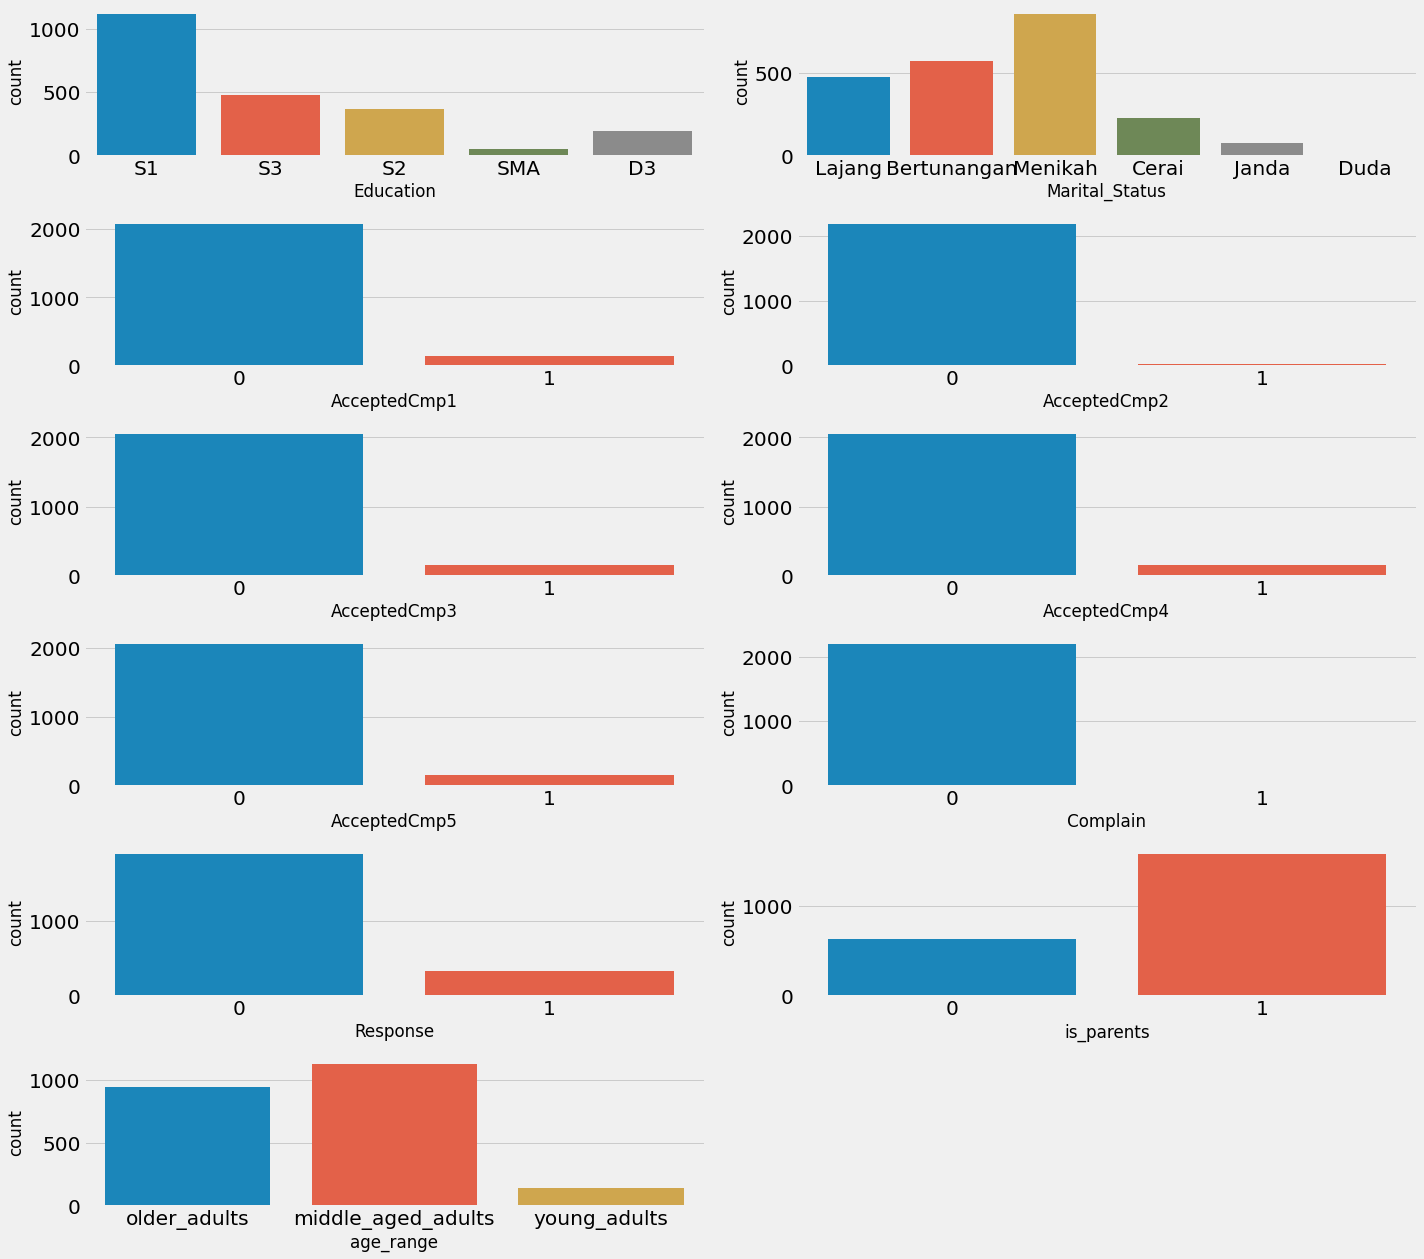

In [312]:
plt.figure(figsize=(20, 20))
for i in range(0, len(categorical_features)):
    plt.subplot(7, 2, i+1)
    sns.countplot(x = df[categorical_features[i]], orient='v')
    plt.tight_layout()

In [313]:
#label encoder
mapping_education = {
    'SMA' : 0,
    'D3' : 1,
    'S1': 2,
    "S2":3,
    "S3":4
}

df['Education_mapped'] = df['Education'].map(mapping_education)


In [314]:
dataset_categorical = df[['Education']].copy()

In [315]:
#One hot encoding
# WARNING: run code ini sekali saja
for cat in ['age_range', 'is_parents','Marital_Status']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    dataset_categorical = dataset_categorical.join(onehots)

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntCoke              2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

### Feature Standardization

In [317]:
# membagi data berdasarkan type datanya
category = df.select_dtypes(include='object')
numerical = df.select_dtypes(exclude='object')

numerical_cols = numerical.columns.to_list()
category_cols = category.columns.to_list()

print("Data numerik: ", numerical_cols)
print("Data category: ", category_cols)

Data numerik:  ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'age', 'join_at_age', 'total_children', 'is_parents', 'total_amount_spent', 'accepted_campaign', 'total_transaction', 'conversion_rate', 'Education_mapped']
Data category:  ['Education', 'Marital_Status', 'age_range']


In [318]:
from sklearn.preprocessing import StandardScaler
df_standard = df.copy()


for i in numerical_cols:
  df_standard[i] = StandardScaler().fit_transform(df_standard[i].values.reshape(len(df_standard), 1))

df_standard

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,age,join_at_age,total_children,is_parents,age_range,total_amount_spent,accepted_campaign,total_transaction,conversion_rate,Education_mapped
0,-0.019809,-0.986443,S1,Lajang,0.234063,-0.823039,-0.928972,-1.974875,0.310532,0.978226,...,0.986443,0.897752,-1.264803,-1.581389,older_adults,1.675488,-0.439265,1.319446,-0.167630,-0.457733
1,-1.051009,-1.236801,S1,Lajang,-0.234559,1.039938,0.909066,1.665141,-0.380509,-0.872024,...,1.236801,1.313688,1.405806,0.632356,older_adults,-0.962358,-0.439265,-1.157987,-0.652811,-0.457733
2,-0.445526,-0.318822,S1,Bertunangan,0.769478,-0.823039,-0.928972,0.172132,-0.795134,0.358511,...,0.318822,0.315443,-1.264803,-1.581389,older_adults,0.280250,-0.439265,0.797881,0.175797,-0.457733
3,0.182737,1.266777,S1,Bertunangan,-1.017239,1.039938,-0.928972,1.923298,-0.795134,-0.872024,...,-1.266777,-1.181925,0.070501,0.632356,middle_aged_adults,-0.919224,-0.439265,-0.897205,-0.625532,-0.457733
4,-0.081373,1.016420,S3,Menikah,0.240221,1.039938,-0.928972,0.821827,1.554407,-0.391671,...,-1.016420,-0.932363,0.070501,0.632356,middle_aged_adults,-0.307044,-0.439265,0.537099,-0.120865,1.533113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1.625801,-0.151917,S1,Menikah,0.356642,-0.823039,0.909066,-0.124749,-0.104093,1.197646,...,0.151917,0.149069,0.070501,0.632356,older_adults,1.217598,-0.439265,0.406708,-0.161784,-0.457733
2236,-0.488620,-1.904422,S3,Bertunangan,0.467539,2.902916,0.909066,1.940508,0.241428,0.299208,...,1.904422,1.979184,2.741110,0.632356,older_adults,-0.270546,1.033369,0.928273,-0.255313,1.533113
2237,0.517646,1.016420,S1,Cerai,0.188091,-0.823039,-0.928972,0.847643,1.450751,1.787710,...,-1.016420,-0.932363,-1.264803,-1.581389,middle_aged_adults,1.051696,1.033369,0.537099,-0.250442,-0.457733
2238,0.814693,-1.069896,S2,Bertunangan,0.675388,-0.823039,0.909066,0.843341,-1.417072,0.364441,...,1.069896,1.147313,0.070501,0.632356,older_adults,0.391404,-0.439265,1.058664,0.670234,0.537690


In [319]:
display(df_standard.shape, df_standard.head(3))

(2216, 39)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,age,join_at_age,total_children,is_parents,age_range,total_amount_spent,accepted_campaign,total_transaction,conversion_rate,Education_mapped
0,-0.019809,-0.986443,S1,Lajang,0.234063,-0.823039,-0.928972,-1.974875,0.310532,0.978226,...,0.986443,0.897752,-1.264803,-1.581389,older_adults,1.675488,-0.439265,1.319446,-0.167630,-0.457733
1,-1.051009,-1.236801,S1,Lajang,-0.234559,1.039938,0.909066,1.665141,-0.380509,-0.872024,...,1.236801,1.313688,1.405806,0.632356,older_adults,-0.962358,-0.439265,-1.157987,-0.652811,-0.457733
2,-0.445526,-0.318822,S1,Bertunangan,0.769478,-0.823039,-0.928972,0.172132,-0.795134,0.358511,...,0.318822,0.315443,-1.264803,-1.581389,older_adults,0.280250,-0.439265,0.797881,0.175797,-0.457733


## Data Modelling

[52288.093153693306, 46753.87944785078, 43443.11503422557, 41157.6999021079, 39082.255872004804, 37807.58788350872, 35969.76463764702, 34726.826579897664, 33721.19138081765, 32627.124641660022, 31633.57944003133, 30876.68325788546, 30138.210802425234, 29537.158694511665]


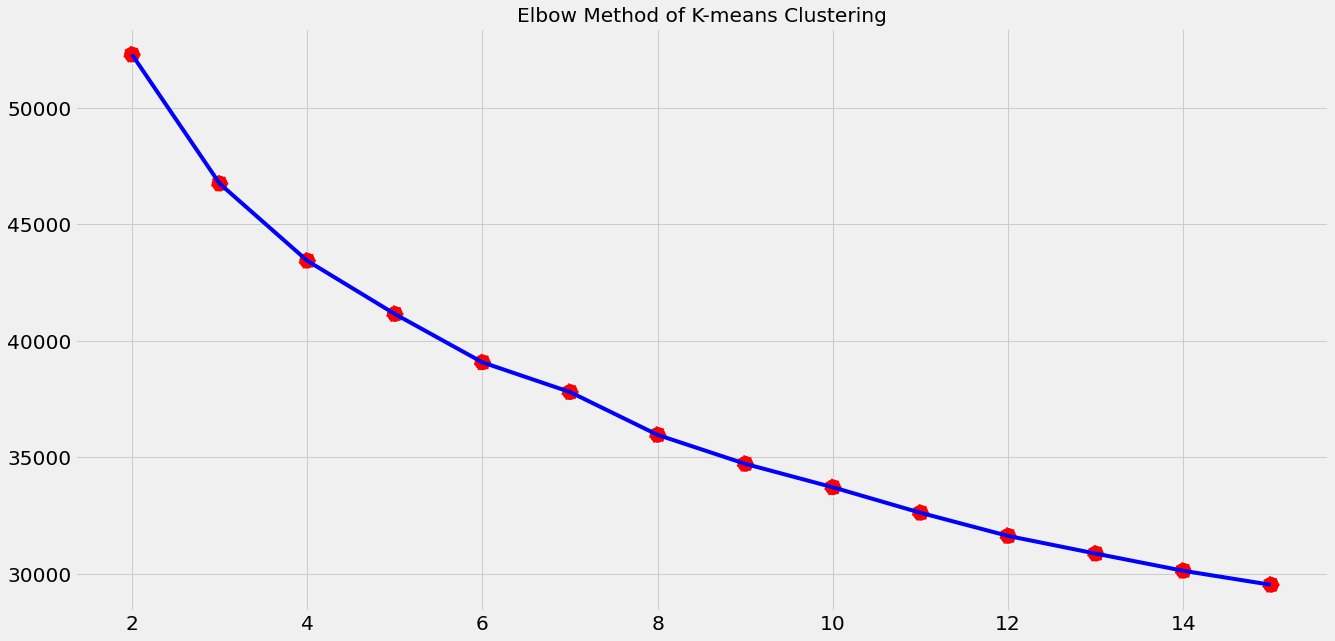

In [320]:
from sklearn.cluster import KMeans
X = df_standard.drop(columns=['ID', 'Year_Birth', 'Education', 'Marital_Status', 'age_range', 'Dt_Customer']).copy()
inertia = []

for i in range(2, 16):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X.values)
    inertia.append(kmeans.inertia_)

print(inertia)
plt.figure(figsize=(20, 10))
plt.title('Elbow Method of K-means Clustering')
# plt.plot(inertia)

sns.lineplot(x=range(2, 16), y=inertia, color='blue', linewidth = 4)
sns.scatterplot(x=range(2, 16), y=inertia, s=300, color='red',  linestyle='--')

In [321]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X.values)
X['cluster'] = kmeans.labels_
df['cluster'] = kmeans.labels_

In [322]:
X

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,age,join_at_age,total_children,is_parents,total_amount_spent,accepted_campaign,total_transaction,conversion_rate,Education_mapped,cluster
0,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,...,0.986443,0.897752,-1.264803,-1.581389,1.675488,-0.439265,1.319446,-0.167630,-0.457733,3
1,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,...,1.236801,1.313688,1.405806,0.632356,-0.962358,-0.439265,-1.157987,-0.652811,-0.457733,1
2,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,...,0.318822,0.315443,-1.264803,-1.581389,0.280250,-0.439265,0.797881,0.175797,-0.457733,3
3,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,...,-1.266777,-1.181925,0.070501,0.632356,-0.919224,-0.439265,-0.897205,-0.625532,-0.457733,1
4,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,...,-1.016420,-0.932363,0.070501,0.632356,-0.307044,-0.439265,0.537099,-0.120865,1.533113,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,3.919308,...,0.151917,0.149069,0.070501,0.632356,1.217598,-0.439265,0.406708,-0.161784,-0.457733,2
2236,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,-0.694260,...,1.904422,1.979184,2.741110,0.632356,-0.270546,1.033369,0.928273,-0.255313,1.533113,2
2237,0.188091,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,-0.385402,...,-1.016420,-0.932363,-1.264803,-1.581389,1.051696,1.033369,0.537099,-0.250442,-0.457733,3
2238,0.675388,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,0.328832,...,1.069896,1.147313,0.070501,0.632356,0.391404,-0.439265,1.058664,0.670234,0.537690,2


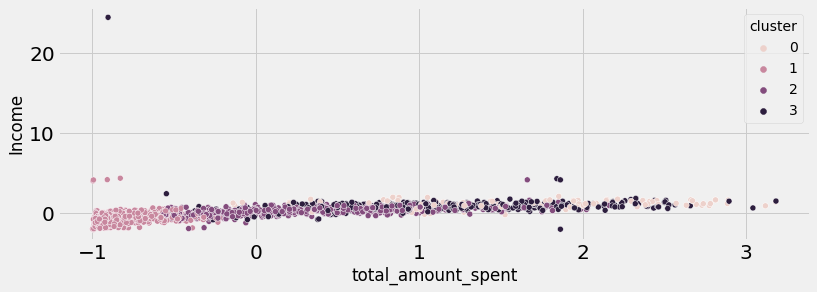

In [323]:
sns.scatterplot(data = X, x='total_amount_spent',y='Income', hue = 'cluster')

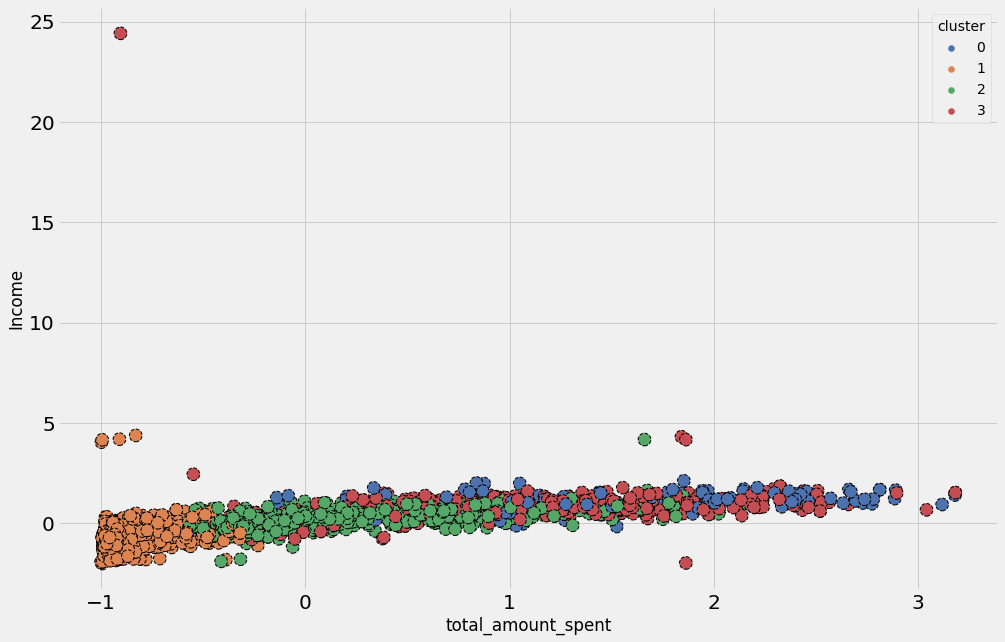

In [324]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(
    x="total_amount_spent", y="Income",
    hue='cluster',
    edgecolor='black',
    linestyle='--',
    data=X,
    palette="deep",
    s=160,
    ax=ax
)

### Silhoutte Score

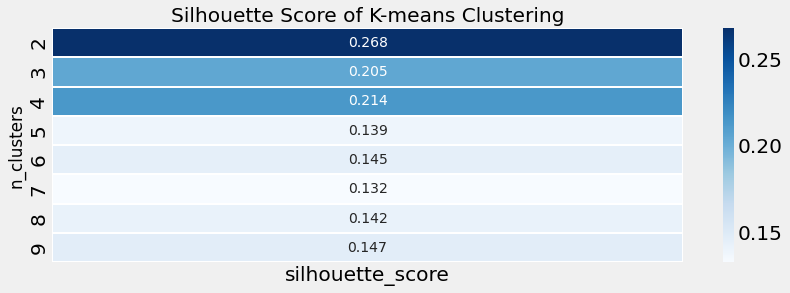

In [325]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='Blues')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()
visualize_silhouette_layer(X)

# Customer personality analysis for marketing retargeting

## Cluster Analysis & Interpretation

### Statistical Summary per Cluster

In [326]:
numerical_features

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntCoke',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Z_CostContact',
 'Z_Revenue',
 'age',
 'join_at_age',
 'total_children',
 'total_amount_spent']

In [327]:
df[numerical_features+['cluster']].groupby('cluster')['Income','total_amount_spent'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Income                                                      \
          count          mean           std         min         25%   
cluster                                                               
0         131.0  8.016937e+07  1.178402e+07  37929000.0  74147000.0   
1        1048.0  3.515160e+07  1.442628e+07   1730000.0  26085000.0   
2         611.0  5.923169e+07  1.146139e+07   4428000.0  52605500.0   
3         426.0  7.570019e+07  3.124778e+07   2447000.0  68695000.0   

                                             total_amount_spent                \
                50%         75%          max              count          mean   
cluster                                                                         
0        81929000.0  87934000.0  105471000.0              131.0  1.582702e+06   
1        34668500.0  42715250.0  162397000.0             1048.0  1.015048e+05   
2        59462000.0  66012000.0  157243000.0              611.0  7.812488e+05   
3        74951500.0  81020500.0  666666000.0              426.0  1.300998e+06   

                                                                              
                   std       min        25%        50%        75%        max  
cluster                                                                       
0        456324.440834  265000.0  1306500.0  1631000.0  1883000.0  2524000.0  
1         92502.076572    5000.0    38750.0    65000.0   137000.0   473000.0  
2        357927.701708  232000.0   489000.0   725000.0  1008500.0  2092000.0  
3        419303.587891   62000.0  1001500.0  1282500.0  1580750.0  2525000.0

In [328]:
df[numerical_features+['cluster']].groupby('cluster')['NumWebVisitsMonth','NumDealsPurchases'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


NumWebVisitsMonth                                                \
                    count      mean       std  min  25%  50%  75%   max   
cluster                                                                   
0                   131.0  3.625954  2.202571  1.0  2.0  3.0  5.0   9.0   
1                  1048.0  6.463740  1.983365  0.0  5.0  7.0  8.0  20.0   
2                   611.0  5.620295  1.859803  0.0  4.0  6.0  7.0   9.0   
3                   426.0  2.591549  1.678185  0.0  1.0  2.0  3.0   9.0   

        NumDealsPurchases                                                
                    count      mean       std  min  25%  50%  75%   max  
cluster                                                                  
0                   131.0  1.229008  1.019539  0.0  1.0  1.0  1.0   7.0  
1                  1048.0  2.074427  1.432397  0.0  1.0  2.0  3.0  15.0  
2                   611.0  3.754501  2.354339  0.0  2.0  3.0  5.0  15.0  
3                   426.0  1.220657  1.128516  0.0  1.0  1.0  1.0  15.0

In [329]:
df[numerical_features+['cluster']].groupby('cluster')['age','total_children'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


age                                                        \
          count       mean        std   min    25%   50%   75%    max   
cluster                                                                 
0         131.0  51.175573  13.688558  27.0  40.00  50.0  63.0   78.0   
1        1048.0  50.520992  11.388576  26.0  43.00  49.0  57.0  129.0   
2         611.0  57.502455   9.691364  30.0  50.00  57.0  66.0   79.0   
3         426.0  54.136150  13.805719  27.0  43.25  53.5  65.0  123.0   

        total_children                                               
                 count      mean       std  min  25%  50%  75%  max  
cluster                                                              
0                131.0  0.251908  0.485854  0.0  0.0  0.0  0.0  2.0  
1               1048.0  1.238550  0.704985  0.0  1.0  1.0  2.0  3.0  
2                611.0  1.184943  0.515500  0.0  1.0  1.0  1.0  3.0  
3                426.0  0.103286  0.304690  0.0  0.0  0.0  0.0  1.0

Melihat dari hasil cluster dengan spending customer. Cluster 0 merupakan customer middle spending. Cluster 1 merupakan customer risk of churn. Cluster 2 merupakan customer low spending. Cluster 3 merupakan customer High spending

In [330]:
map_cluster = {
    0 : 'Low Spender',
    1 : 'Risk of Churn',
    2 : 'Mid Spender',
    3 : 'High Spender'
}

df['cluster_mapped'] = df['cluster'].map(map_cluster)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

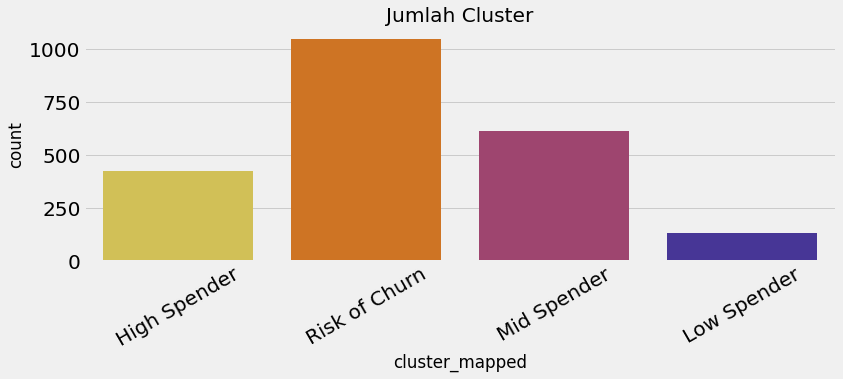

In [331]:
sns.countplot(x = df['cluster_mapped'], palette = 'CMRmap_r')
plt.title('Jumlah Cluster')
plt.xticks(rotation = 30)

(0.0, 120000000.0)

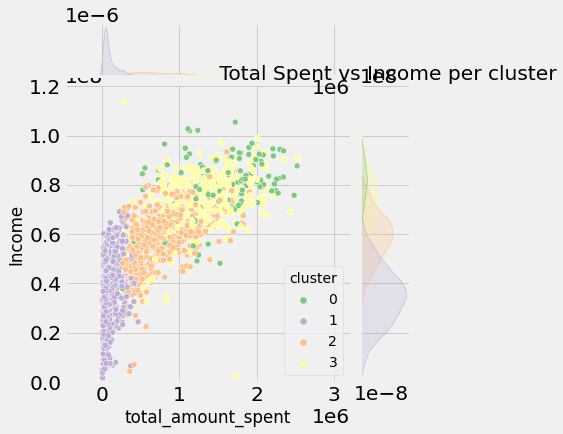

In [332]:
plot = sns.jointplot(x = df['total_amount_spent'], y = df['Income'],hue = df['cluster'], palette = 'Accent')
plt.title(" Total Spent vs Income per cluster")
plot.ax_marg_y.set_ylim(0, 120000000)

### Total Income per Cluster

Text(0.5, 1.0, 'Income per Cluster')

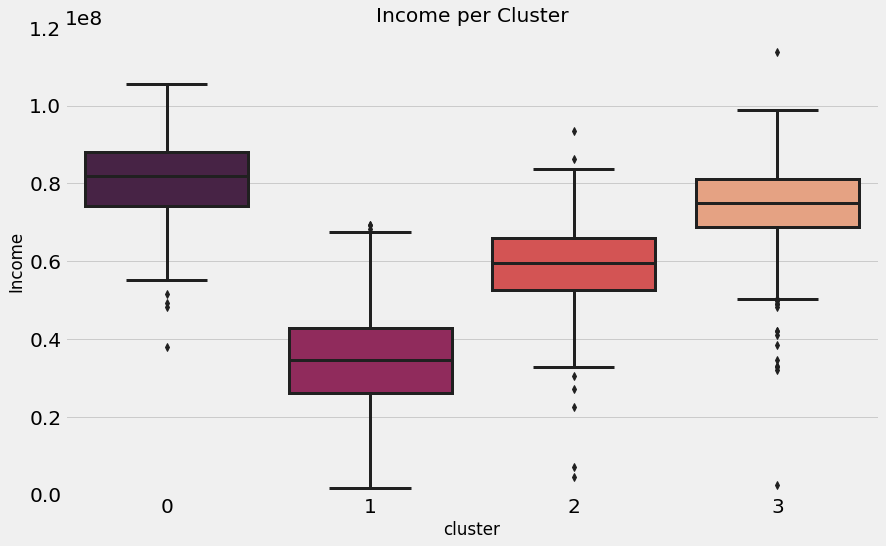

In [333]:
plt.figure(figsize = (13, 8))
sns.boxplot(x="cluster", y="Income", data=df, palette='rocket')
plt.ylim(0, 120000000)
plt.title('Income per Cluster')

(0.0, 120000000.0)

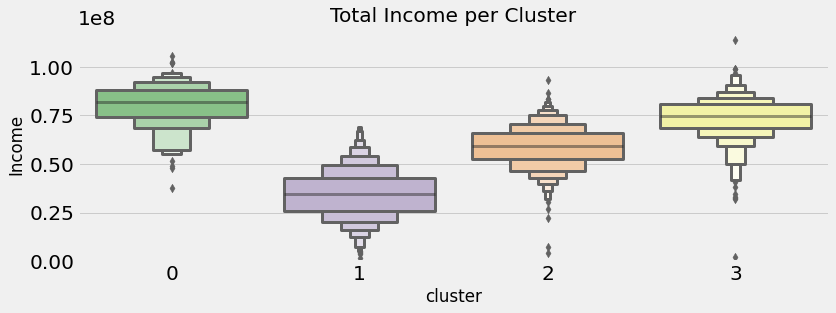

In [334]:
sns.boxenplot(x=df['cluster'], y=df['Income'], palette ='Accent')
plt.title('Total Income per Cluster')
plt.ylim(0, 120000000)

### Total Spending per Cluster

Text(0.5, 1.0, 'Total Amount Spent per Cluster')

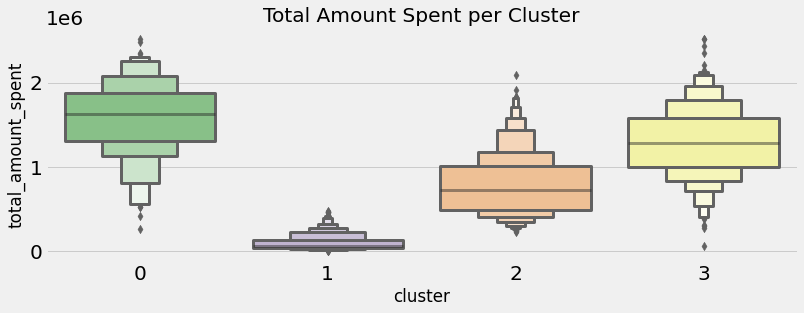

In [335]:
sns.boxenplot(x=df['cluster'], y=df['total_amount_spent'], palette ='Accent')
plt.title('Total Amount Spent per Cluster')

### Total Visits per Cluster

Text(0.5, 1.0, 'Number Web Vistiors per Cluster')

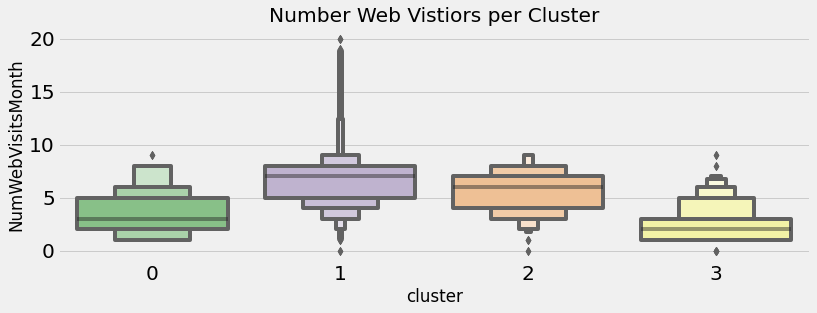

In [347]:
sns.boxenplot(x=df['cluster'], y=df['NumWebVisitsMonth'], palette ='Accent')
plt.title('Number Web Vistiors per Cluster')

### Total Deal Purchased per Cluster

Text(0.5, 1.0, 'Total Deal Purchased per Cluster')

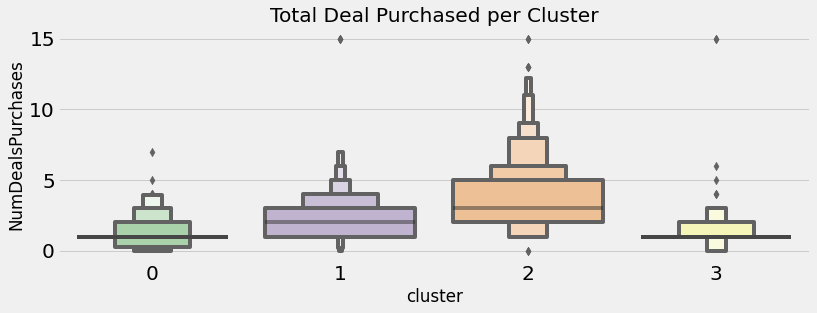

In [348]:
sns.boxenplot(x=df['cluster'], y=df['NumDealsPurchases'], palette ='Accent')
plt.title('Total Deal Purchased per Cluster')

### Conversion per Cluster

Text(0.5, 1.0, 'Conversion per Cluster')

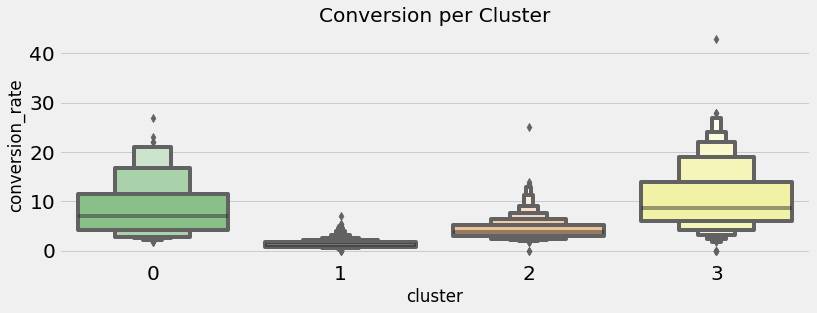

In [349]:
sns.boxenplot(x=df['cluster'], y=df['conversion_rate'], palette ='Accent')
plt.title('Conversion per Cluster')

### Age per Cluster

Text(0.5, 1.0, 'Age per Cluster')

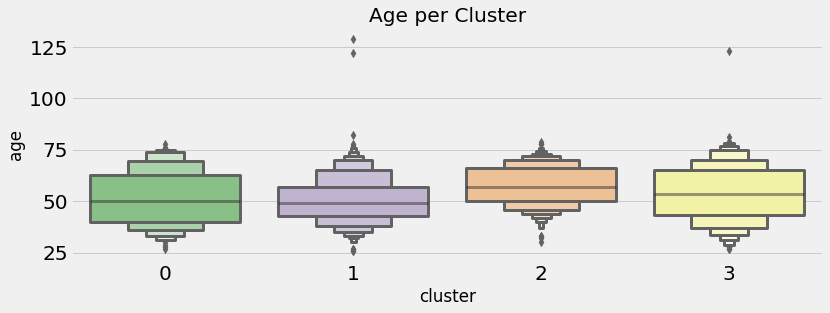

In [339]:
sns.boxenplot(x=df['cluster'], y=df['age'], palette ='Accent')
plt.title('Age per Cluster')

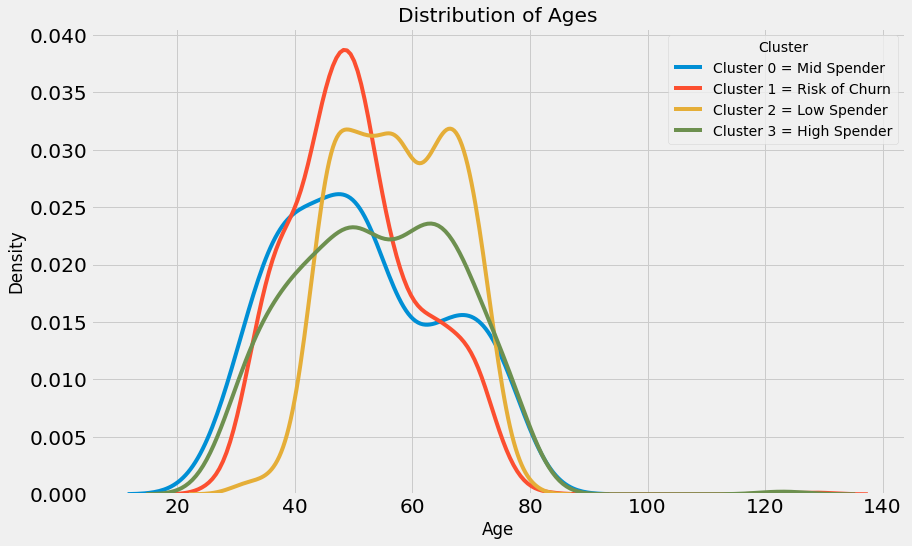

In [340]:
plt.figure(figsize = (13, 8))

plt.style.use('fivethirtyeight')
sns.kdeplot(df.loc[df['cluster'] == 0, 'age'])
sns.kdeplot(df.loc[df['cluster'] == 1, 'age'])
sns.kdeplot(df.loc[df['cluster'] == 2, 'age'])
sns.kdeplot(df.loc[df['cluster'] == 3, 'age'])

# Labeling of plot

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Ages')
plt.legend(labels=["Cluster 0 = Mid Spender","Cluster 1 = Risk of Churn","Cluster 2 = Low Spender","Cluster 3 = High Spender"], title = "Cluster")
plt.show()

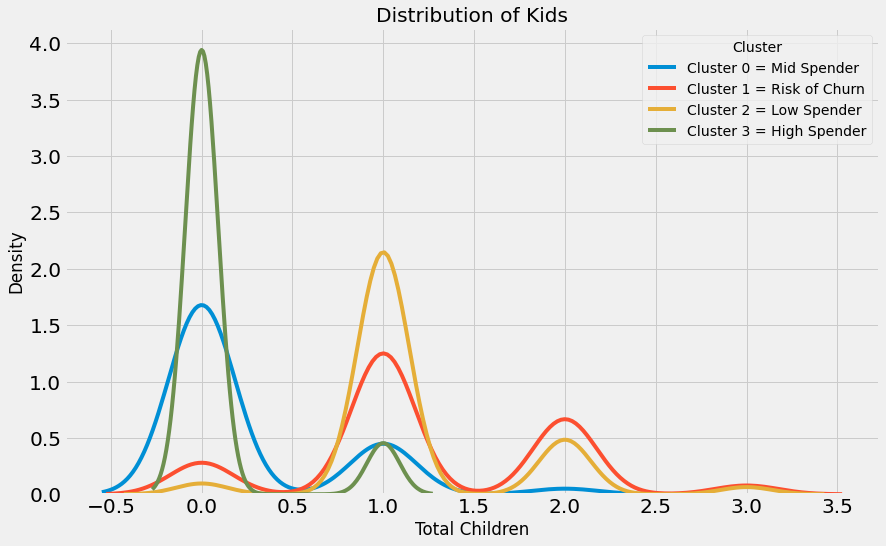

In [341]:
plt.figure(figsize = (13, 8))

plt.style.use('fivethirtyeight')
sns.kdeplot(df.loc[df['cluster'] == 0, 'total_children'])
sns.kdeplot(df.loc[df['cluster'] == 1, 'total_children'])
sns.kdeplot(df.loc[df['cluster'] == 2, 'total_children'])
sns.kdeplot(df.loc[df['cluster'] == 3, 'total_children'])

# Labeling of plot

plt.xlabel('Total Children')
plt.ylabel('Density')
plt.title('Distribution of Kids')
plt.legend(labels=["Cluster 0 = Mid Spender","Cluster 1 = Risk of Churn","Cluster 2 = Low Spender","Cluster 3 = High Spender"], title = "Cluster")
plt.show()

## Interpretation

1. Low Spender (Cluster 2):
- Kelompok ini didominasi oleh older_adults (>55 tahun) dan middle_aged_adults (36-55 tahun), yang dominan telah menikah dan mempunyai 1 anak. 
- Kelompok ini mengunjungi website cukup sering, kedua tersering setelah Cluster 1, dengan median sebanyak 5 kali dalam sebulan, walaupun demikian, kelompok ini cukup sering mencari promo yang masing-masing orangnya membeli promo 2 kali dalam sebulan (median)
- Namun, kelompok ini mempunyai total pendapatan dan pengeluaran terkecil kedua dibandingkan Kelompok lainnya, yang masing-masing sebesar IDR 59 Juta untuk total pendapatan setahun, dan IDR 780K untuk pengeluaran dalam setahun


2. Risk of Churn (Cluster 1):
- Kelompok ini adalah kelompok dengan jumlah user terbesar sebanyak 1048 orang yang di dominasi oleh middle_aged_adults (36-55 tahun), yang dominan telah menikah dan mempunyai 1-2 anak.
- Dari segi pendapatan dan pengeluaran, kelompok ini mempunyai pendapatan dan pengeluaran paling kecil di setiap bulannya, yang masing-masing sebesar IDR 35 Juta untuk total pendapatan setahun, dan IDR 100K untuk pengeluaran dalam setahun
- Walaupun demikian, kelompok ini adalah kelompok yang paling sering mengunjungi web dengan median total kunjungan 7 kali dalam sebulan, walaupun demikian, mereka masih jarang untuk bertransaksi dan bahkan menggunakan promo pada transaksinya
- Secara campaign juga tidak banyak yang merespon dibandingkan dengan Kelompok lainnya. Mereka datang secara organic (Organicc Search).


3. Mid Spender(Cluster 3):
- Kelompok ini didominasi oleh older_adults (>55 tahun) dan middle_aged_adults (36-55 tahun), yang dominan telah menikah dan mempunyai 0-1 anak
- Kelompok ini mempunyai total pendapatan dan pengeluaran terbesar kedua dibandingkan Kelompok lainnya, yang masing-masing sebesar IDR 75 Juta untuk total pendapatan setahun, dan IDR 1.3 Juta untuk pengeluaran dalam setahun
- Walaupun cukup jarang untuk visit web, Kelompok ini adalah kelompok yang paling sering merespon campaign kita dan yang paling sering menggunakan promo dalam sebulannya dengan rata-rata penggunaan promo sebanyak 3 kali dalam sebulan


4. High Spender (Cluster 0):
- Kelompok ini adalah kelompok dengan jumlah user terkecil sebanyak 131 orang yang di dominasi oleh older_adults (>55 tahun) dan middle_aged_adults (36-55 tahun), yang dominan telah belum/tidak menikah dan belum mempunyai anak 
- Dari segi pendapatan dan pengeluaran, kelompok ini mempunyai pendapatan dan pengeluaran paling besar di setiap bulannya, yang masing-masing sebesar IDR 80 Juta untuk total pendapatan setahun, dan IDR 1.5 Juta untuk pengeluaran dalam setahun
- Cluster ini cukup banyak yang merupakan non-organic dengan merespon campaign, namun memiliki jumlah penggunaan promo yang paling sedikit dibandingkan dengan yang lainnya.
- Kelompok ini adalah kelompok yang mempunyai conversion rate terbesar untuk membeli produk kita, dan kita jangan sampai kehilangan mereka.

## Recommendation

Recommendation:
1. Tetap monitor transaksi dan retensi dari kelompok High Spender, Fokus untuk tingkatkan service agar kelompok kelompok ini tidak churn
2. Untuk kelompok Mid Spender dapat dilakukan analisis lebih lanjut bagaimana agar meningkatkan transaksinya dengan memberikan rekomendasi yang lebih personal, serta analisis lebih dalam bagaimana untuk optimasi promo pada segmen ini dan tetap berbelanja di platform kita
3. Untuk kelompok Low Spender dan Risk to Churn, juga dapat dilakukan analisis lebih lanjut bagaimana meningkatkan rasio konversi visit to transaction, Mereka mempunyai jumlah visit yang cukup tinggi tapi tidak melakukan transaksi. Hal ini dapat disebabkan oleh produk ataupun harga yang tidak cocok.

Potential Impact:
- Jika kita fokus untuk terus monitor kelompok High Spender, kita akan tetap mendapatkan potensial GMV sebesar IDR 554 Juta, sedangkan untuk kelompok Mid Spender sebesar IDR 64 Juta
- Jika kita dapat optimasi promo yang di spend untuk Mid Spender (dengan asumsi reduksi 50%)m kita dapat melakukan reduksi cost seevsar IDR 83 Juta

In [342]:
df[df.cluster == 3].total_amount_spent.sum()

554225000

In [343]:
df[df.cluster == 3].total_amount_spent.sum() / df[df.cluster == 3].total_transaction.sum()

64317.62794476036

In [344]:
df[df.cluster == 2].total_amount_spent.sum()

477343000

In [345]:
df[df.cluster == 2].total_amount_spent.sum() / df[df.cluster == 2].total_transaction.sum()

36214.47538123056

In [346]:
# jumlah yang dapat di save jika dapat optimasi promo cost (asumsi: target reduce 50%)
(df[df.cluster == 2].total_amount_spent.sum() / df[df.cluster == 2].total_transaction.sum()) * df[df.cluster == 2].NumDealsPurchases.sum()

83076006.5245429